In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [2]:
# Loading Train dataset:
df = pd.read_csv('insurance_dataset.csv')
# Top 5 records:
df.head()

,id,name,age,sex,bmi,children,salary,smoker,region,expenses
0,1,name1,19,female,27.9,0.0,21984.47,yes,southwest,16884.92
1,2,name2,18,male,33.8,1.0,1725.55,no,southeast,1725.55
2,3,name3,28,male,33.0,3.0,3756.62,no,southeast,4449.46
3,4,name4,33,male,22.7,0.0,3756.62,no,northwest,21984.47
4,5,name5,32,male,28.9,0.0,39611.76,no,northwest,3866.86


In [3]:
print(df.info)

<bound method DataFrame.info of         id   name  age     sex   bmi  children    salary smoker     region  \
0        1  name1   19  female  27.9       0.0  21984.47    yes  southwest   
1        2  name2   18    male  33.8       1.0   1725.55     no  southeast   
2        3  name3   28    male  33.0       3.0   3756.62     no  southeast   
3        4  name4   33    male  22.7       0.0   3756.62     no  northwest   
4        5  name5   32    male  28.9       0.0  39611.76     no  northwest   
...    ...    ...  ...     ...   ...       ...       ...    ...        ...   
1333  1334    NaN   50    male  31.0       3.0       NaN     no  northwest   
1334  1335    NaN   18  female  31.9       0.0       NaN     no  northeast   
1335  1336    NaN   18  female  36.9       0.0       NaN     no  southeast   
1336  1337    NaN   21  female  25.8       0.0       NaN     no  southwest   
1337  1338    NaN   61  female  29.1       0.0       NaN    yes  northwest   

      expenses  
0     16884.92

In [4]:
df.isnull()

,id,name,age,sex,bmi,children,salary,smoker,region,expenses
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,False,True,False,False,False,False,True,False,False,False
1334,False,True,False,False,False,False,True,False,False,False
1335,False,True,False,False,False,False,True,False,False,False
1336,False,True,False,False,False,False,True,False,False,False


In [5]:
df.describe(include='all')

,id,name,age,sex,bmi,children,salary,smoker,region,expenses
count,1338.000000,742,1338.000000,1337,1338.000000,1337.000000,25.000000,1336,1338,1337.000000
unique,NaN,742,NaN,4,NaN,NaN,NaN,2,4,NaN
top,NaN,name227,NaN,male,NaN,NaN,NaN,no,southeast,NaN
freq,NaN,1,NaN,671,NaN,NaN,NaN,1063,364,NaN
mean,669.500000,NaN,39.482810,NaN,30.665471,1.167539,15063.330400,NaN,NaN,13268.741219
std,386.391641,NaN,17.325001,NaN,6.098382,2.961134,13900.967037,NaN,NaN,12114.386381
min,1.000000,NaN,18.000000,NaN,16.000000,0.000000,1137.010000,NaN,NaN,1121.870000
25%,335.250000,NaN,27.000000,NaN,26.300000,0.000000,3756.620000,NaN,NaN,4738.270000
50%,669.500000,NaN,39.000000,NaN,30.400000,1.000000,10797.340000,NaN,NaN,9377.900000
75%,1003.750000,NaN,51.000000,NaN,34.700000,2.000000,21984.470000,NaN,NaN,16657.720000


In [6]:
df.describe(include='all')

,id,name,age,sex,bmi,children,salary,smoker,region,expenses
count,1338.000000,742,1338.000000,1337,1338.000000,1337.000000,25.000000,1336,1338,1337.000000
unique,NaN,742,NaN,4,NaN,NaN,NaN,2,4,NaN
top,NaN,name227,NaN,male,NaN,NaN,NaN,no,southeast,NaN
freq,NaN,1,NaN,671,NaN,NaN,NaN,1063,364,NaN
mean,669.500000,NaN,39.482810,NaN,30.665471,1.167539,15063.330400,NaN,NaN,13268.741219
std,386.391641,NaN,17.325001,NaN,6.098382,2.961134,13900.967037,NaN,NaN,12114.386381
min,1.000000,NaN,18.000000,NaN,16.000000,0.000000,1137.010000,NaN,NaN,1121.870000
25%,335.250000,NaN,27.000000,NaN,26.300000,0.000000,3756.620000,NaN,NaN,4738.270000
50%,669.500000,NaN,39.000000,NaN,30.400000,1.000000,10797.340000,NaN,NaN,9377.900000
75%,1003.750000,NaN,51.000000,NaN,34.700000,2.000000,21984.470000,NaN,NaN,16657.720000


**Trực quan hóa tập dữ liệu**


---


**Cột Age (Tuổi)**




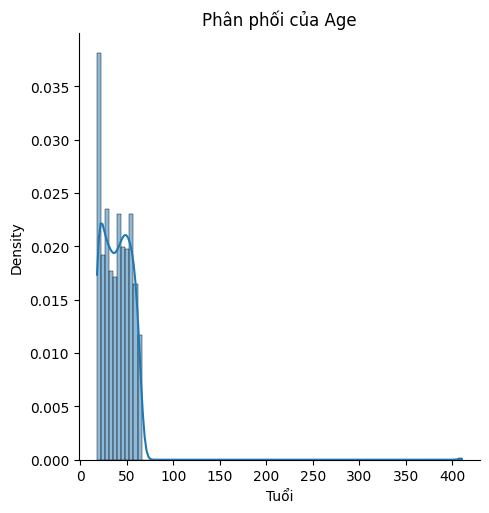

In [7]:
sns.displot(df['age'], kde=True, stat='density')
plt.title('Phân phối của Age')
plt.xlabel('Tuổi')
plt.ylabel('Density')
plt.show()

In [8]:
# Chuyển đổi cột 'age' thành kiểu dữ liệu float
df['age'] = df['age'].astype(float)


 Nhận thấy cột Age có khoảng giá trị khá đồng điều trong khoảng từ 20 - 60 tuổi. Xuất hiện outlier (giá trị nhiễu với giá trị hơn 400)
  => Tiến hành xử lý loại bỏ nhiễu.

**Cột Sex (giới tính)**

671 660 1338


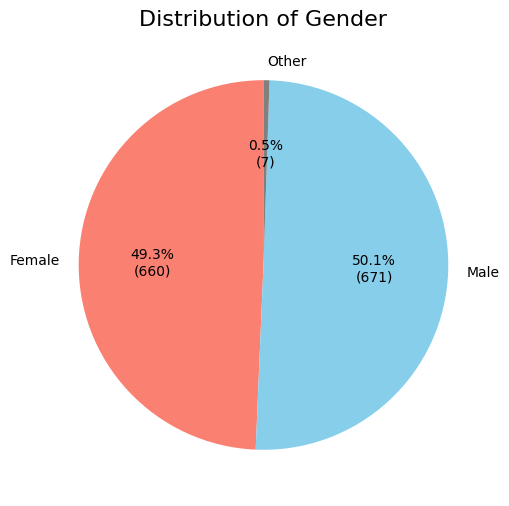

In [9]:
import matplotlib.pyplot as plt

# Tính toán số lượng và phần trăm
male_count = df['sex'].value_counts().get('male')
female_count = df['sex'].value_counts().get('female')
total_count = len(df['sex'])
print(male_count, female_count, total_count)

# Tính số lượng và phần trăm cho giá trị không phải 'Male' và 'Female'
other_count = total_count - male_count - female_count
other_percentage = (other_count / total_count) * 100

# Dữ liệu và nhãn
gioi_tinh = ['Female', 'Male', 'Other']
so_luong = [female_count, male_count, other_count]
percentages = [f"{count} ({percentage:.1f}%)" for count, percentage in zip(so_luong, [female_count/total_count*100, male_count/total_count*100, other_count/total_count*100])]
colors = ['salmon', 'skyblue', 'gray']

# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(so_luong, labels=gioi_tinh, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, total_count * p / 100), startangle=90, colors=colors)

# Thêm tiêu đề
plt.title('Distribution of Gender', fontsize=16)

# Hiển thị biểu đồ
plt.show()


Nhận thấy giới tính nam và nữ có sự đồng đều với tỉ lệ male(nam) chiếm 50.1% (660 dòng), nữ chiếm 49.3% (671) và các giá trị khác chiếm 0.5% (7) trên tổng các giá trị có trong cột sex (giới tính)
=> Chuẩn hóa các giá trị khác thành male và female. Sau đó chuyển male thành 0 và female thành 0 qua labelencoder

**Cột bmi (chỉ số khối của cơ thể)**

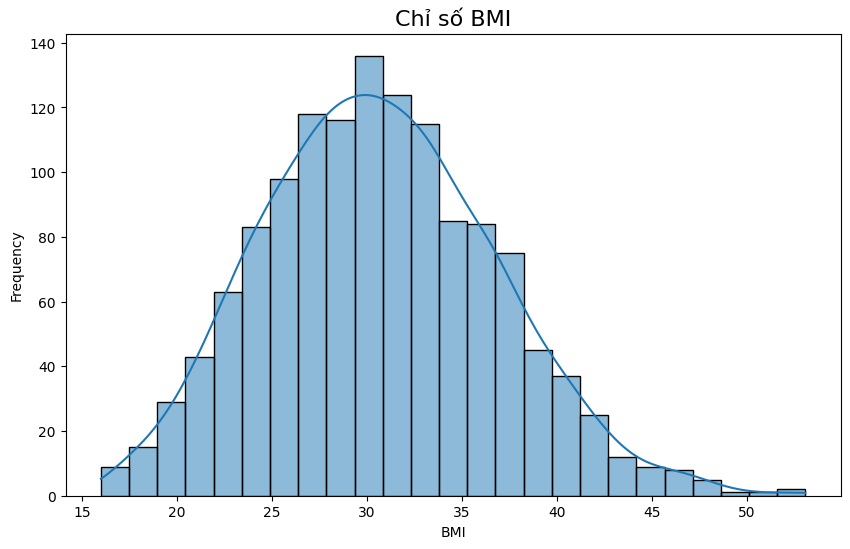

In [10]:
# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], kde=True, bins=25)
plt.title('Chỉ số BMI', fontsize=16)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


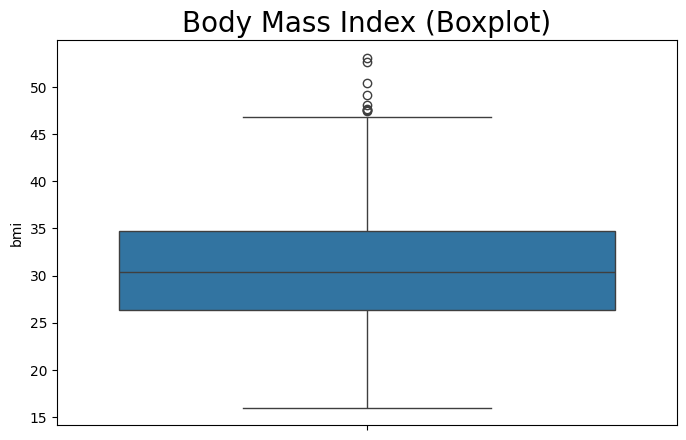

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(df['bmi'])
plt.title('Body Mass Index (Boxplot)', fontsize=20)
plt.show()

Nhận thấy các chỉ số BMI xuất hiện khá đồng đều từ giá trị 17 - 40. Xuất hiện một số lớn hơn 40 cho chỉ số BMI (đều này thể hiện răng dữ liệu có thể bị nhập sai hoặc có thể là một dữ liệu thực tế). Tuy nhiên cần phải loại bỏ để tránh ảnh hưởng đến quá trình dự đoán của mô hình
=> Lọc nhiễu các thông số BMI trên 40.

**Cột Children (Số lượng con cái)**

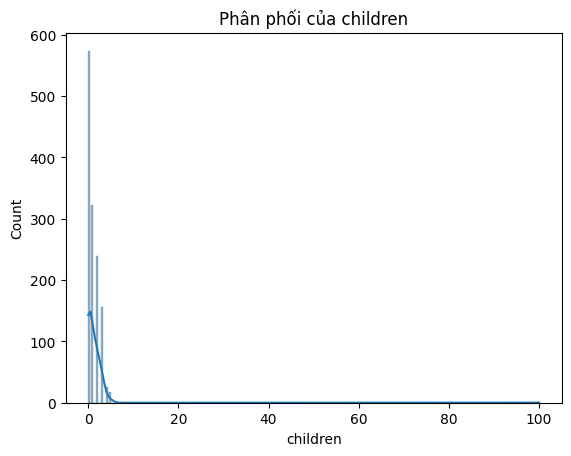

In [12]:
# Vẽ biểu đồ phân phối của biến children
sns.histplot(df['children'], kde=True)  # kde=True để vẽ đường biểu đồ mật độ xác suất
plt.title('Phân phối của children')
plt.xlabel('children')
plt.ylabel('Count')
plt.show()

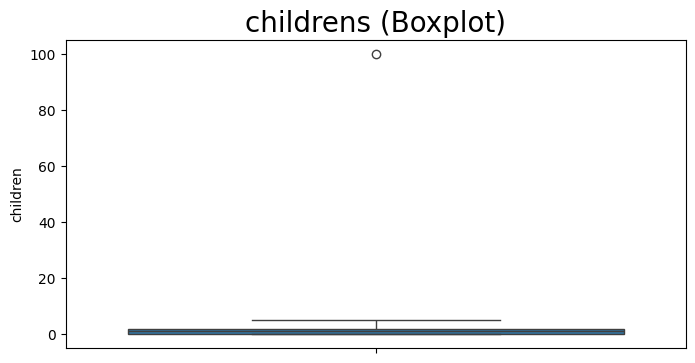

In [13]:
plt.figure(figsize=(8,4))
sns.boxplot(df['children'])
plt.title('childrens (Boxplot)', fontsize=20)
plt.show()

Nhận thấy các giá trị xuất hiện đồng đều trong khoảng từ 0 - 5. Xuất hiện giá trị nhiễu là 100 gây ảnh hưởng đến kết quả dự đoán => Tiến hành loại bỏ nhiễu

**Cột Smoker (Người hút thuốc)**

273 1063 1338


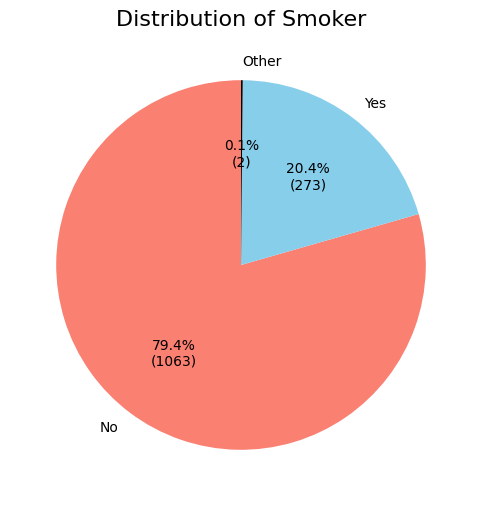

In [14]:
import matplotlib.pyplot as plt

# Tính toán số lượng và phần trăm
yes_count = df['smoker'].value_counts().get('yes')
no_count = df['smoker'].value_counts().get('no')
total_count = len(df['smoker'])
print(yes_count, no_count, total_count)

# Tính số lượng và phần trăm cho giá trị không phải 'yes' và 'no'
other_count = total_count - yes_count - no_count
other_percentage = (other_count / total_count) * 100

# Dữ liệu và nhãn
hut_thuoc = ['No', 'Yes', 'Other']
so_luong = [no_count, yes_count, other_count]
percentages = [f"{count} ({percentage:.1f}%)" for count, percentage in zip(so_luong, [no_count/total_count*100, yes_count/total_count*100, other_count/total_count*100])]
colors = ['salmon', 'skyblue', 'black']

# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(so_luong, labels=hut_thuoc, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, total_count * p / 100), startangle=90, colors=colors)

# Thêm tiêu đề
plt.title('Distribution of Smoker', fontsize=16)

# Hiển thị biểu đồ
plt.show()


In [15]:
# Kiểm tra giá trị duy nhất và số lượng của chúng
smoker_counts = df['smoker'].value_counts()

# In ra giá trị duy nhất và số lượng của chúng
print("Unique values and counts in 'smoker' column:")
for value, count in smoker_counts.items():
    print(f"{value}: {count}")


Unique values and counts in 'smoker' column:
no: 1063
yes: 273


Nhận thấy tỉ lệ người hút thuốc chiếm khá ít so với phần còn lại với tỉ lệ là  20.4% và 79.4%. Phần còn lại là 0.1% các giá trị khác => Tiến hành xóa các cột khác giá trị

**Cột region(Vùng miền)**

Counts for each region:
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


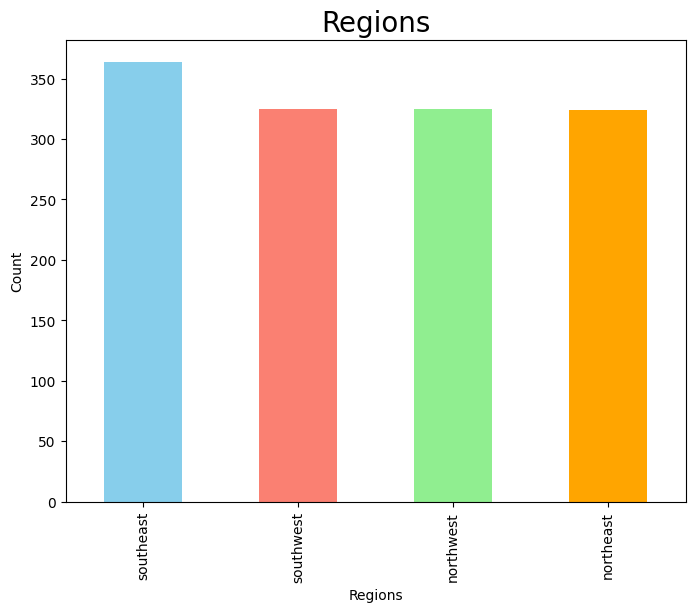

In [16]:
# Value Counts:
region_counts = df['region'].value_counts()
print("Counts for each region:")
print(region_counts)

# Visualization:
plt.figure(figsize=(8, 6))
region_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'orange'])
plt.title('Regions', fontsize=20)
plt.xlabel('Regions')
plt.ylabel('Count')
plt.show()


Nhận thấy số người đến từ vùng southeast có một chút nhỉnh hơn so với các vùng miền còn lại.

**Cột expenses (Chi phí cho bảo hiểm)**

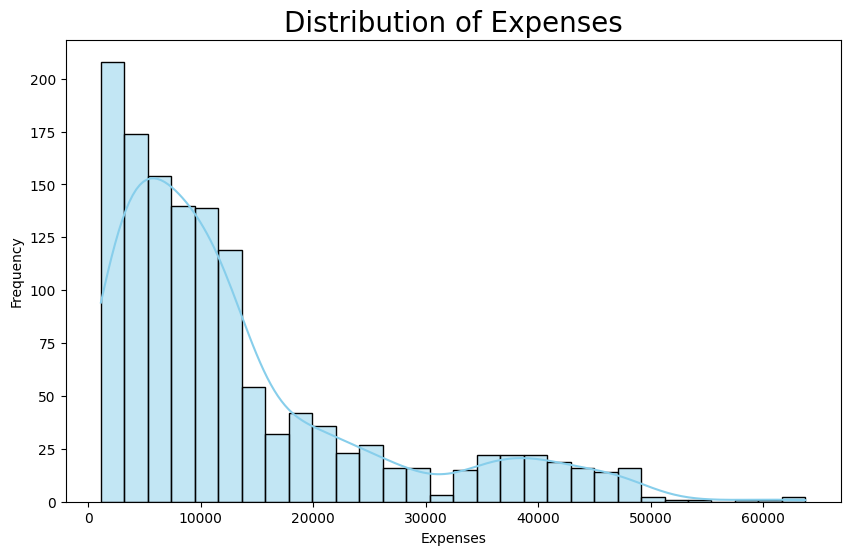

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['expenses'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Expenses', fontsize=20)
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.show()


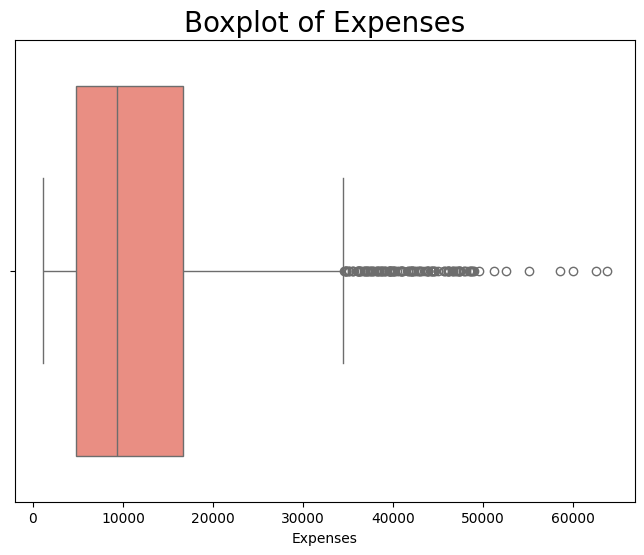

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['expenses'], color='salmon')
plt.title('Boxplot of Expenses', fontsize=20)
plt.xlabel('Expenses')
plt.show()


Nhận thấy mức chi phí bảo hiểm mà đa số người dùng thường mua là khoảng từ 4000 đến hơn 60000

**Tiền xử lý dữ liệu**

Kiểm tra giá trị null của từng cột


In [19]:
#Đếm số hàng có giá trị null của từng cột
null_counts = df.isnull().sum()
print(null_counts)

id             0
name         596
age            0
sex            1
bmi            0
children       1
salary      1313
smoker         2
region         0
expenses       1
dtype: int64


- Xử lý giá trị null của cột sex, smoker và expenses
- Xóa cột name và salary vì quá ít dữ liệu

**Xử lý xóa các cột ID, name và salary**

In [20]:
# Xóa cột name và id vì không cần thiết trong việc dự đoán
df.drop(columns=['name'], inplace=True)
df.drop(columns=['id'], inplace=True)

# Xóa cột salary vì quá ít dữ liệu
df.drop(columns=['salary'], inplace=True)

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19.0,female,27.9,0.0,yes,southwest,16884.92
1,18.0,male,33.8,1.0,no,southeast,1725.55
2,28.0,male,33.0,3.0,no,southeast,4449.46
3,33.0,male,22.7,0.0,no,northwest,21984.47
4,32.0,male,28.9,0.0,no,northwest,3866.86


**Xử lý cột Age**

In [22]:
# Xóa giá trị nhiễu trong cột age
df['age'] = df['age'].replace(410, np.nan)
df = df.dropna(subset=['age'])

Kết quả sau khi đã xử lý

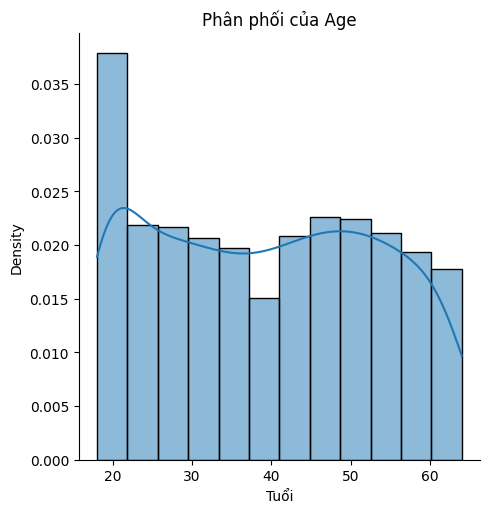

In [23]:
sns.displot(df['age'], kde=True, stat='density')
plt.title('Phân phối của Age')
plt.xlabel('Tuổi')
plt.ylabel('Density')
plt.show()

Dữ liệu đã mất oulier => Được trực quan hóa một cách hiệu quả và dễ hiểu hơn

**Xử lý cột sex(giới tính)**

In [24]:
# Lấy các giá trị riêng biệt của cột 'sex' trong DataFrame
unique_values = df['sex'].unique()

# Đếm số lần xuất hiện của mỗi giá trị
unique_counts = df['sex'].value_counts()

# In ra các giá trị duy nhất và số lần xuất hiện
for value in unique_values:
    count = unique_counts.get(value, 0)
    print(f"'{value}': {count} occurrences")


'female': 660 occurrences
'male': 670 occurrences
'nan': 0 occurrences
'M': 4 occurrences
'F': 2 occurrences


In [25]:
#Điền ngẫu nhiên vào hàng có giá trị là null
df['sex'].fillna(np.random.choice(['male', 'female']), inplace=True)
df[(df['sex'] != 'male') & (df['sex'] != 'female')]


,age,sex,bmi,children,smoker,region,expenses
169,27.0,M,18.9,3.0,no,northeast,4827.90
170,63.0,M,41.5,0.0,no,southeast,13405.39
171,49.0,M,30.3,0.0,no,southwest,8116.68
172,18.0,M,16.0,0.0,no,northeast,1694.80
220,34.0,F,33.7,1.0,no,southwest,5012.47
221,53.0,F,33.3,0.0,no,northeast,10564.88


In [26]:
# Chuẩn hóa M -> male, F -> female
mapping_dict = {'M': 'male', 'F': 'female'}
df['sex'] = df['sex'].replace(mapping_dict)
print(df['sex'].unique())


['female' 'male']


In [27]:
# Tạo một trình mã hóa
sex_label_encoder = LabelEncoder()

# Áp dụng trình mã hóa cho cột "sex"
df['sex'] = sex_label_encoder.fit_transform(df['sex'])

# Kiểm tra các giá trị duy nhất trong cột "sex" sau khi mã hóa
print(df['sex'].unique())

[0 1]


In [28]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19.0,0,27.9,0.0,yes,southwest,16884.92
1,18.0,1,33.8,1.0,no,southeast,1725.55
2,28.0,1,33.0,3.0,no,southeast,4449.46
3,33.0,1,22.7,0.0,no,northwest,21984.47
4,32.0,1,28.9,0.0,no,northwest,3866.86


Kết quả sau khi xử lý dữ liệu

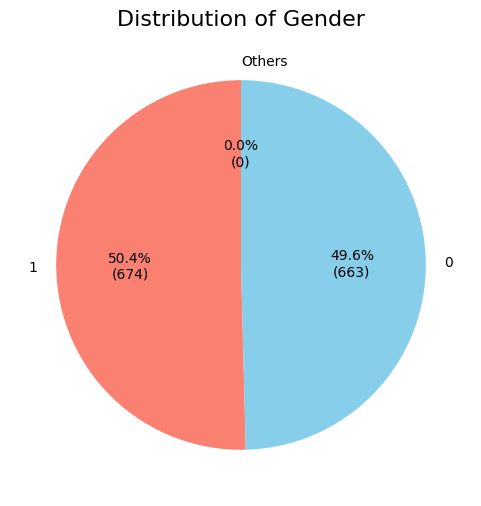

In [29]:
import matplotlib.pyplot as plt

# Tính toán số lượng và phần trăm
gender_counts = df['sex'].value_counts()
total_count = len(df['sex'])

# Kiểm tra số lượng giá trị không xác định
undefined_count = total_count - gender_counts.sum()

# Xác định giới tính và số lượng
gioi_tinh = list(gender_counts.index) + ['Others']
so_luong = list(gender_counts.values) + [undefined_count]

# Tính toán phần trăm
percentages = [(count / total_count) * 100 for count in so_luong]

# Dữ liệu và nhãn
colors = ['salmon', 'skyblue', 'gray']

# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(so_luong, labels=gioi_tinh, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, total_count * p / 100), startangle=90, colors=colors)

# Thêm tiêu đề
plt.title('Distribution of Gender', fontsize=16)

# Hiển thị biểu đồ
plt.show()


Đã điền vào giá trị ngẫu nhiên (male hoặc female) cho cột null, chuẩn hóa giá trị M và F sau đó tiến hành mã hóa male và female lần lượt thành 0 và 1 bằng labelEncoder thành công.

**Xử lý cột children (số con cái)**

In [30]:
#Xử lý dòng dữ liệu thiếu
df['children'].fillna(np.random.choice(df['children']), inplace=True)
df[(df['children'] == 'NaN')]


,age,sex,bmi,children,smoker,region,expenses


In [31]:
unique_values = df['children'].unique()
unique_counts = df['children'].value_counts()
for value in unique_values:
    count = unique_counts.get(value, 0)
    print(f"'{value}': {count} occurrences")

'0.0': 575 occurrences
'1.0': 322 occurrences
'3.0': 156 occurrences
'2.0': 240 occurrences
'5.0': 18 occurrences
'4.0': 25 occurrences
'100.0': 1 occurrences


In [32]:
# Xử lý giá trị nhiễu
# Thay thế giá trị 100 bằng NaN
df['children'] = df['children'].replace(100, np.nan)

# Xóa giá trị nhiễu từ cột 'children'
df = df.dropna(subset=['children'])


Kết quả sau khi xử lý dữ liệu

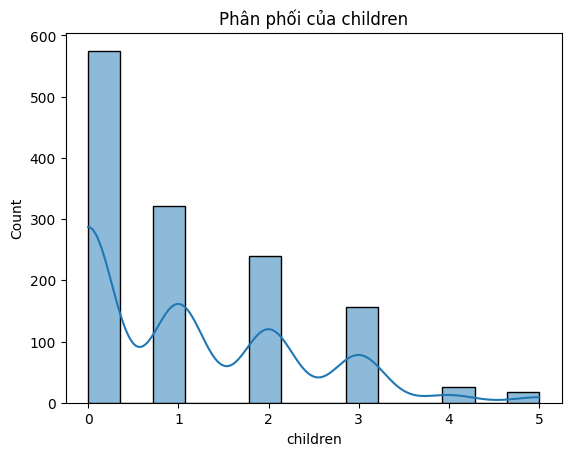

In [33]:
# Vẽ biểu đồ phân phối của biến children
sns.histplot(df['children'], kde=True)  # kde=True để vẽ đường biểu đồ mật độ xác suất
plt.title('Phân phối của children')
plt.xlabel('children')
plt.ylabel('Count')
plt.show()

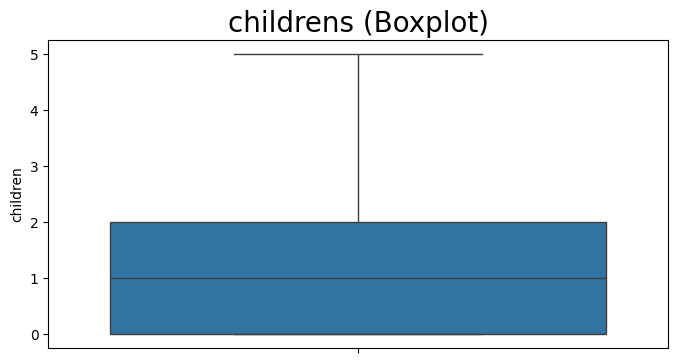

In [34]:
plt.figure(figsize=(8,4))
sns.boxplot(df['children'])
plt.title('childrens (Boxplot)', fontsize=20)
plt.show()

Đã xử lý dòng dữ liệu null và xóa dữ liệu nhiễu thành công.

**Xử lý cột smoker (người hút thuốc)**

In [35]:
# Lấy các giá trị duy nhất của cột 'smoker' trong DataFrame
unique_values = df['smoker'].unique()

# Đếm số lần xuất hiện của mỗi giá trị
unique_counts = df['smoker'].value_counts()

# In ra các giá trị duy nhất và số lần xuất hiện
for value in unique_values:
    count = unique_counts.get(value, 0)
    print(f"'{value}': {count} occurrences")

'yes': 273 occurrences
'no': 1061 occurrences
'nan': 0 occurrences


In [36]:
#Xử lý dòng dữ liệu thiếu
df['smoker'].fillna(np.random.choice(['yes', 'no']), inplace=True)

In [37]:
# Tạo một trình mã hóa
smoker_label_encoder = LabelEncoder()
df['smoker'] = smoker_label_encoder.fit_transform(df['smoker'])
print(df['smoker'].unique())

[1 0]


Kết quả sau khi xử lý dữ liệu

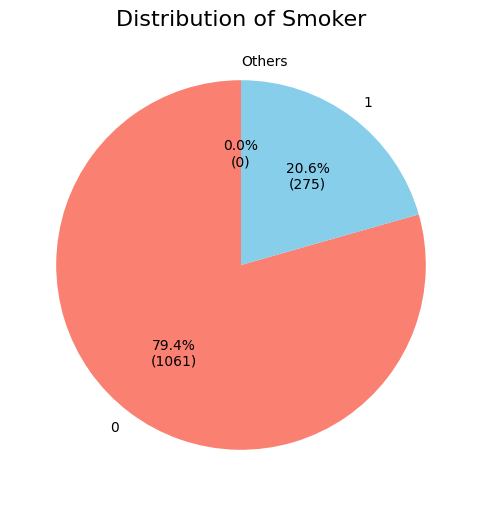

In [38]:
import matplotlib.pyplot as plt

# Tính toán số lượng và phần trăm
smoker_counts = df['smoker'].value_counts()
total_count = len(df['smoker'])

# Kiểm tra số lượng giá trị không xác định
undefined_count = total_count - smoker_counts.sum()

# Xác định giá trị và số lượng
gia_tri = list(smoker_counts.index) + ['Others']
so_luong = list(smoker_counts.values) + [undefined_count]

# Tính toán phần trăm
percentages = [(count / total_count) * 100 for count in so_luong]

# Dữ liệu và nhãn
colors = ['salmon', 'skyblue', 'gray']

# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(so_luong, labels=gia_tri, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, total_count * p / 100), startangle=90, colors=colors)

# Thêm tiêu đề
plt.title('Distribution of Smoker', fontsize=16)

# Hiển thị biểu đồ
plt.show()


Xóa các cột dữ liệu bị thiếu và mã hóa yes no thành 0 1 bằng encoder thành công

**Xử lý cột BMI**

In [39]:
df['bmi'] = df['bmi'].where(df['bmi'] <= 50, 50)


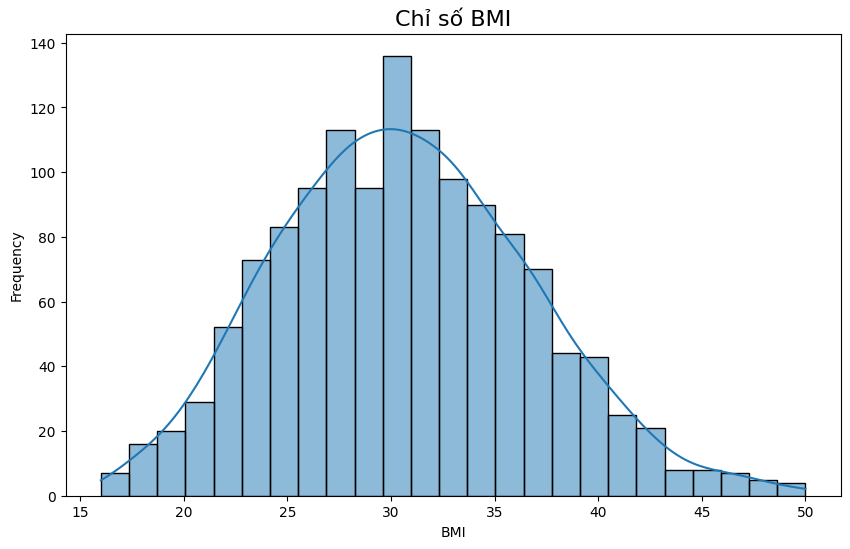

In [40]:
# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], kde=True, bins=25)
plt.title('Chỉ số BMI', fontsize=16)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


Kết quả sau khi xử lý dữ liệu:
Đã thay thế giá trị bmi > 50 thành 50 trong cột dữ liệu.

**Xử lý cột expenses**

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1336 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1336 non-null   float64
 1   sex       1336 non-null   int32  
 2   bmi       1336 non-null   float64
 3   children  1336 non-null   float64
 4   smoker    1336 non-null   int32  
 5   region    1336 non-null   object 
 6   expenses  1335 non-null   float64
dtypes: float64(4), int32(2), object(1)
memory usage: 73.1+ KB


In [42]:
df.dropna(subset=['expenses'], inplace=True)
df['expenses'] = df['expenses'].astype(float)

Kết quả sau khi xử lý dữ liệu

In [43]:
print(df.isnull().sum())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


Đã điền giá trị random vào dòng bị null


---



In [44]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19.0,0,27.9,0.0,1,southwest,16884.92
1,18.0,1,33.8,1.0,0,southeast,1725.55
2,28.0,1,33.0,3.0,0,southeast,4449.46
3,33.0,1,22.7,0.0,0,northwest,21984.47
4,32.0,1,28.9,0.0,0,northwest,3866.86




---



**So sánh tương quan**

In [45]:
import pandas as pd
import plotly.express as px
# age và expenses
rs = px.scatter(df, x="age", y="expenses", trendline="ols")
rs.show()


Nhận xét tương quan giữa age và expenses:
Nhận thấy mức chi cho bảo hiểm tăng dần theo độ tuổi(từ trái qua phải)
=> Mức phí cho bảo hiểm sẽ càng cao khi tuổi càng lớn

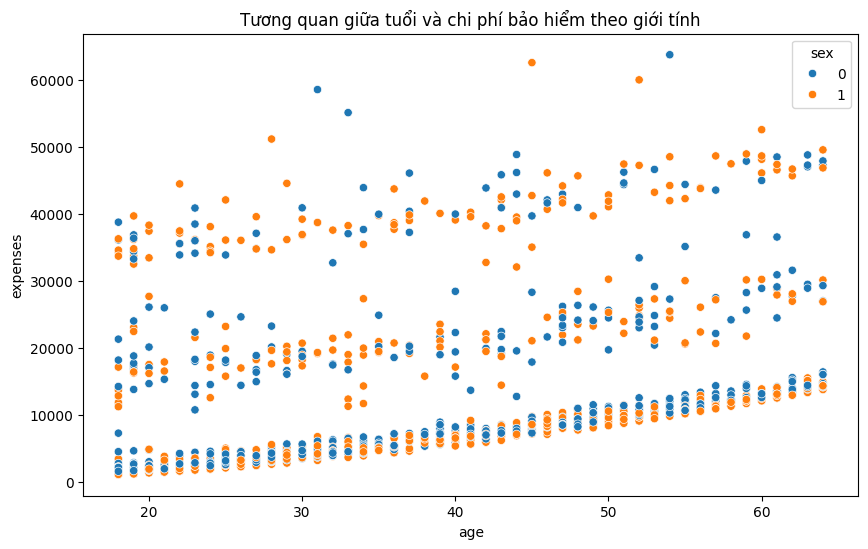

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo scatter plot với hue là 'sex'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='expenses', hue='sex', data=df)
plt.title('Tương quan giữa tuổi và chi phí bảo hiểm theo giới tính')
plt.show()


Giới tính không quá ảnh hưởng đến chi phí bảo hiểm

In [47]:
fig = px.scatter(df, x="bmi", y="expenses", trendline="ols")
fig.show()

Nhận xét tương quan giữa bmi và expenses:
Nhận thấy người có chỉ số bmi càng cao thì mức chi cho bảo hiểm càng tăng (từ trái qua phải)
=> Chỉ số bmi ảnh hưởng đến mức chi cho bảo hiểm

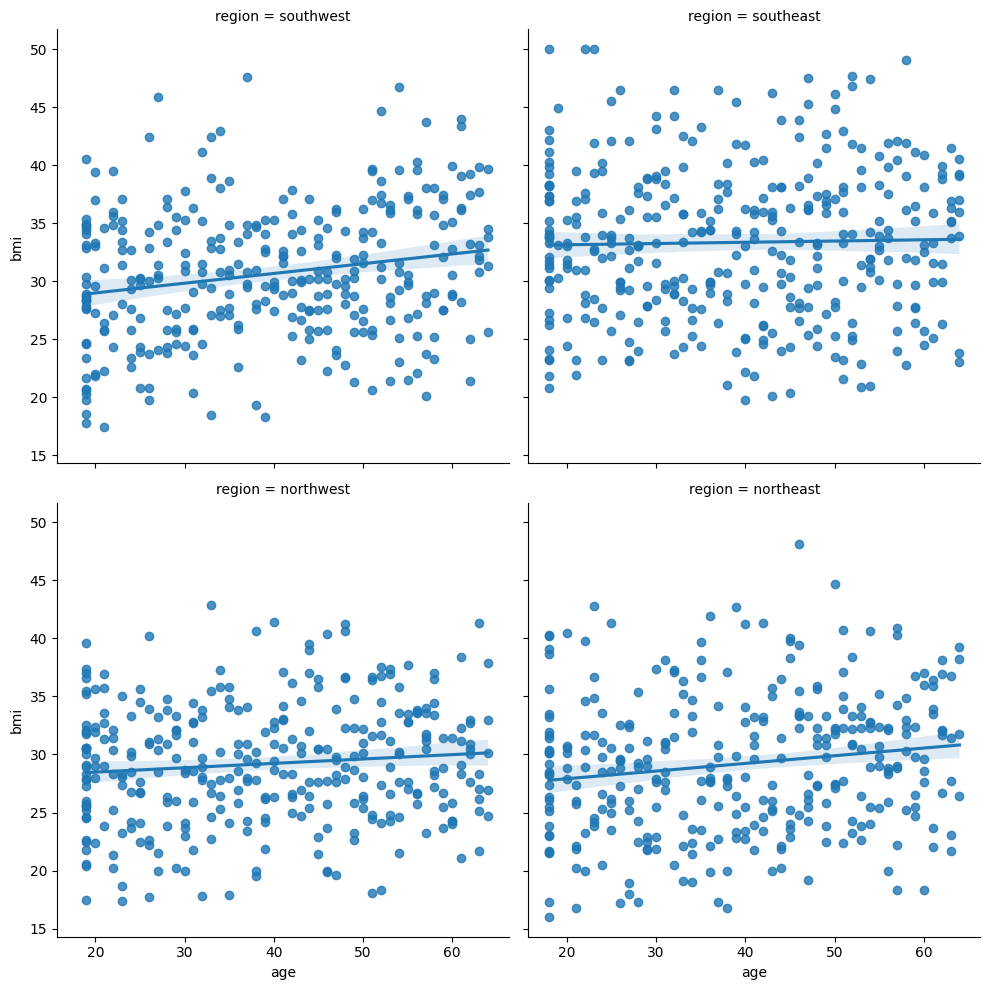

In [48]:
sns.lmplot(x='age',y='bmi',col='region',col_wrap=2,data=df)

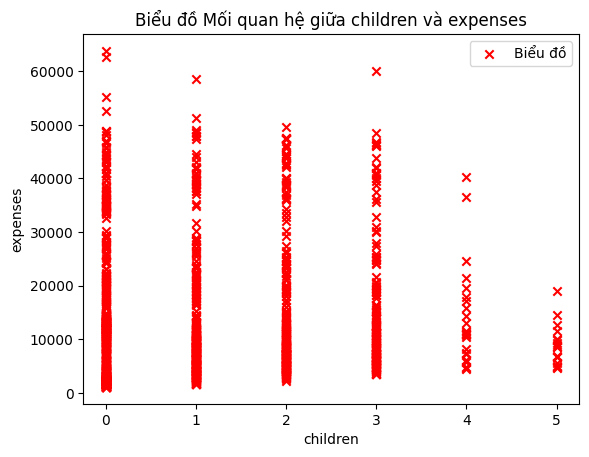

In [49]:
# Vẽ biểu đồ tương quan của biến children và expenses

# Tạo scatter plot
plt.scatter(df['children'], df['expenses'], label='Biểu đồ', color='red', marker='x')

plt.title('Biểu đồ Mối quan hệ giữa children và expenses')
plt.xlabel('children')
plt.ylabel('expenses')

plt.legend()

plt.show()


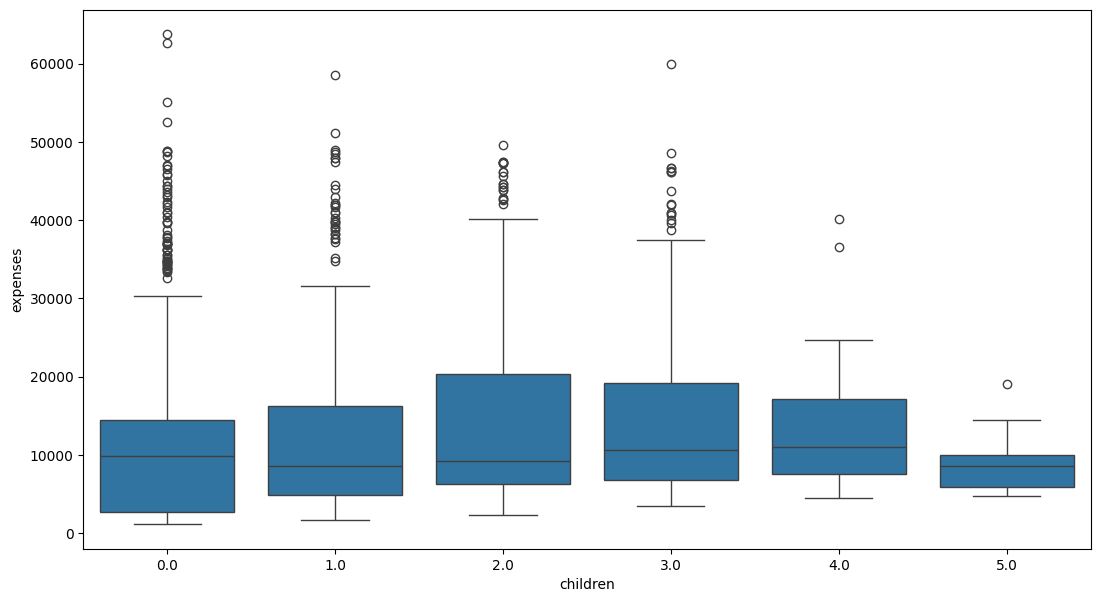

In [50]:
plt.figure(figsize=(13,7))
sns.boxplot(x='children',y='expenses',data=df)
plt.show()

In [51]:
df.pivot_table(index= 'age', columns= 'children', values= 'expenses', aggfunc= 'sum').head(10).round(2)

children,0.0,1.0,2.0,3.0,4.0,5.0
age,,,,,,
18.0,338173.58,41475.47,67515.30,21705.32,4561.19,NaN
19.0,510568.78,38262.30,88668.19,18838.70,NaN,4687.80
20.0,134775.76,68677.02,43967.43,37465.34,NaN,9745.69
21.0,45700.73,25812.69,39136.26,3861.21,17942.11,NaN
22.0,104662.70,86948.87,41410.21,47340.34,NaN,NaN
23.0,115403.40,69651.71,114855.06,47844.80,NaN,NaN
24.0,256015.41,12609.89,3537.70,8853.01,17128.43,NaN
25.0,92316.38,34796.47,105667.39,28231.24,9382.64,5080.10
26.0,42885.86,29091.72,70436.59,4661.29,24671.66,NaN


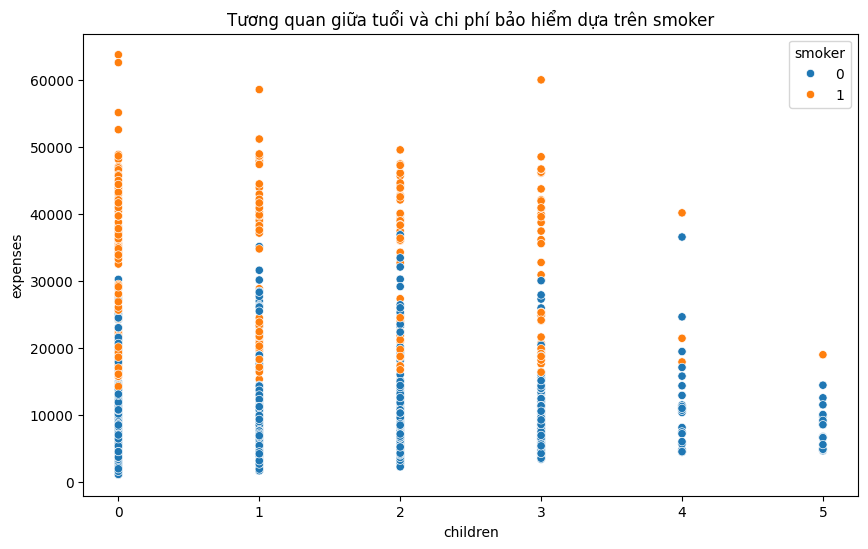

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo scatter plot với hue là 'sex'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='children', y='expenses', hue='smoker', data=df)
plt.title('Tương quan giữa tuổi và chi phí bảo hiểm dựa trên smoker')
plt.show()


<Axes: xlabel='region', ylabel='expenses'>

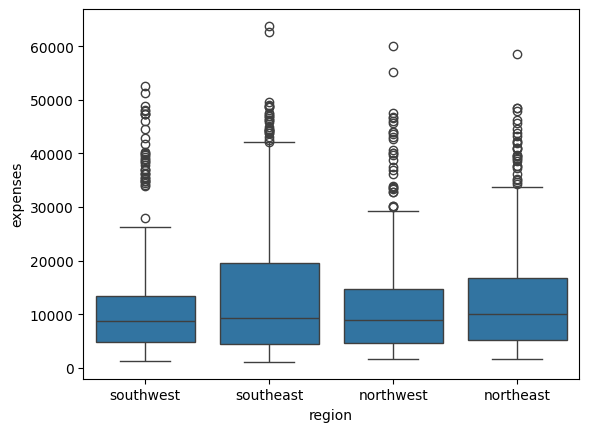

In [53]:
sns.boxplot(x='region',y='expenses',data=df)

Chúng ta có thể thấy chi phí ở vùng Đông Nam là cao nhất và các khu vực khác
cũng tương đối cao. Vì thế, không có sự chênh lệch quá nhiều của chi phí ở các
vùng.

<Axes: xlabel='smoker', ylabel='expenses'>

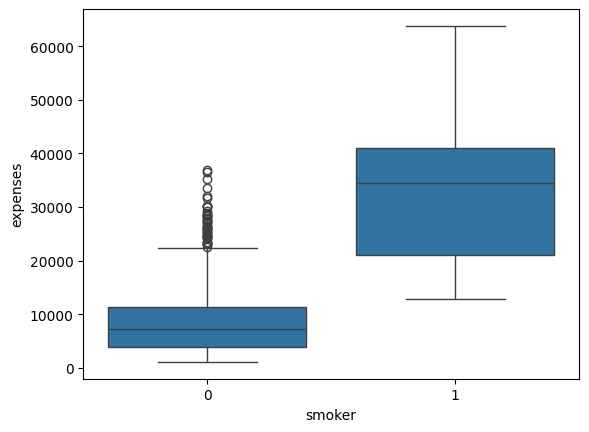

In [54]:
sns.boxplot(x='smoker',y='expenses',data=df)


Chúng ta có thể nhận thấy thông qua biểu đồ hộp là những người hút thuốc thì chi
phí sẽ cao hơn rất nhiều so với những người không hút thuốc. Điều này là hiển nhiên
bởi vì hút thuốc rất có hại và có khả năng gặp nhiều vấn đề về sức khỏe hơn những
người không hút thuốc.

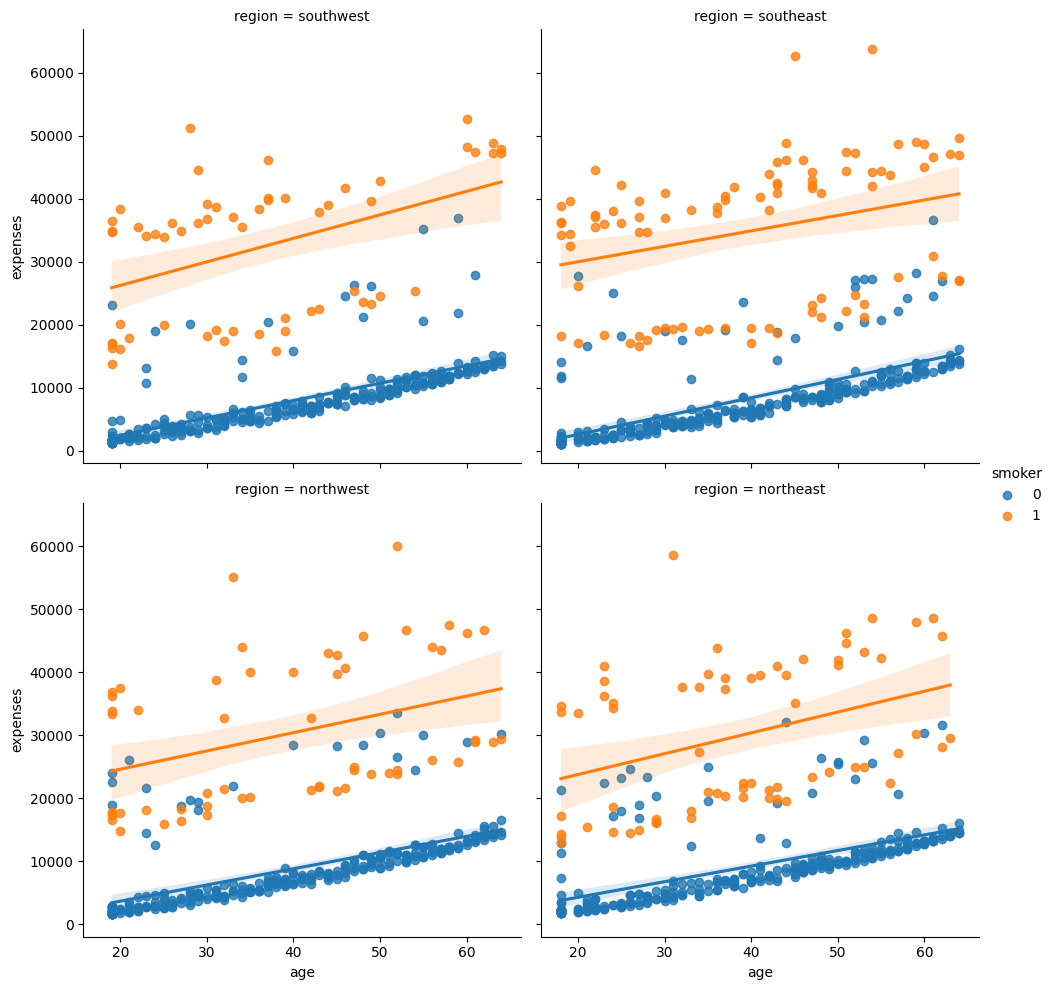

In [55]:
sns.lmplot(x='age',y='expenses',col='region',hue='smoker',col_wrap=2,data=df)

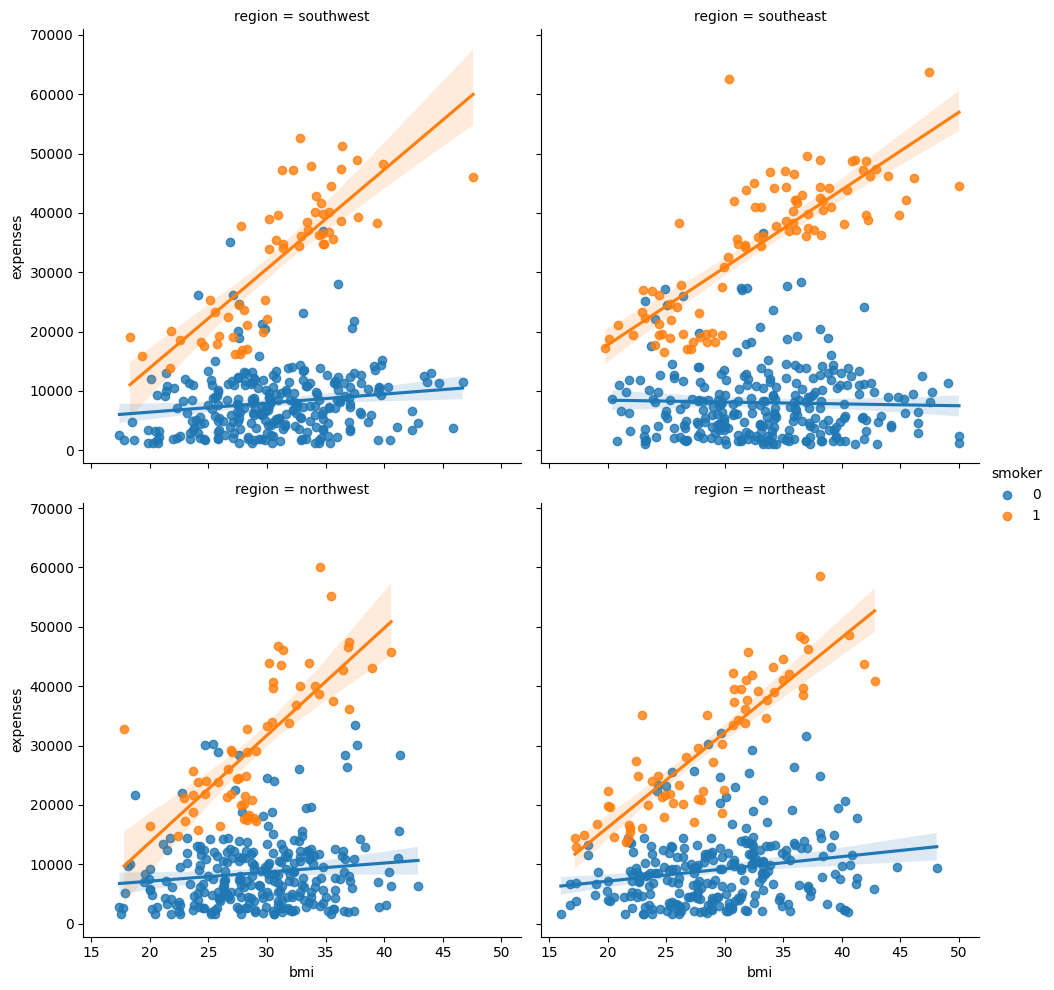

In [56]:
sns.lmplot(x='bmi',y='expenses',col='region',hue='smoker',col_wrap=2,
data=df)

In [57]:
#Sử dụng OHE cho cột region để phân ra 4 giá trị riêng biệt
df = pd.get_dummies(df, drop_first=False)
df.head(5)


,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,0,27.9,0.0,1,16884.92,0,0,0,1
1,18.0,1,33.8,1.0,0,1725.55,0,0,1,0
2,28.0,1,33.0,3.0,0,4449.46,0,0,1,0
3,33.0,1,22.7,0.0,0,21984.47,0,1,0,0
4,32.0,1,28.9,0.0,0,3866.86,0,1,0,0


In [58]:
#Sắp xếp lại các cột
df = df[['age','sex','smoker','bmi','children','region_northeast', 'region_northwest','region_southeast','region_southwest','expenses']]
df.head()

,age,sex,smoker,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,expenses
0,19.0,0,1,27.9,0.0,0,0,0,1,16884.92
1,18.0,1,0,33.8,1.0,0,0,1,0,1725.55
2,28.0,1,0,33.0,3.0,0,0,1,0,4449.46
3,33.0,1,0,22.7,0.0,0,1,0,0,21984.47
4,32.0,1,0,28.9,0.0,0,1,0,0,3866.86


In [59]:
df.columns


Index(['age', 'sex', 'smoker', 'bmi', 'children', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest', 'expenses'],
      dtype='object')

In [60]:
# Splitting Independent & Dependent Feature:
X = df.iloc[:, :-1]  # chứa tất cả các cột của train_data ngoại trừ cột cuối cùng (input)
y = df.iloc[:, -1]   # chỉ lấy cột nhãn (output)

In [61]:
X.head()

,age,sex,smoker,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,0,1,27.9,0.0,0,0,0,1
1,18.0,1,0,33.8,1.0,0,0,1,0
2,28.0,1,0,33.0,3.0,0,0,1,0
3,33.0,1,0,22.7,0.0,0,1,0,0
4,32.0,1,0,28.9,0.0,0,1,0,0


In [62]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [64]:
# X_train.head()

Hồi quy tuyến tính

In [84]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Initialize empty lists to store metrics for each iteration
mae_list = []
rmse_list = []
r2_list = []

# Perform linear regression and evaluation 10 times
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    linear_regression = LinearRegression()
    linear_regression.fit(X_train, y_train)
    
    y_pred = linear_regression.predict(X_test)
    
    # Calculate metrics for each iteration
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred) * 100
    
    # Append metrics to the lists
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Calculate the average of the metrics
average_mae = np.mean(mae_list)
average_rmse = np.mean(rmse_list)
average_r2 = np.mean(r2_list)

# Print the average scores
print("Average MAE:", average_mae)
print("Average RMSE:", average_rmse)
print("Average R2 Score:", average_r2, "%")


Average MAE: 4322.406388120244
Average RMSE: 6227.613376330072
Average R2 Score: 73.58287863519767 %


Cây quyết định

In [85]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Initialize empty lists to store metrics for each iteration
rmse_list_dt = []
mae_list_dt = []
r2_list_dt = []

# Initialize empty list to store predictions for plotting
predictions_dt = []

# Perform Decision Tree regression and evaluation 10 times
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    decision_tree_model = DecisionTreeRegressor(max_depth=5, random_state=13)
    decision_tree_model.fit(X_train, y_train)
    
    y_pred_dt = decision_tree_model.predict(X_test)
    
    # Calculate metrics for each iteration
    rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
    mae_dt = mean_absolute_error(y_test, y_pred_dt)
    r2_dt = r2_score(y_test, y_pred_dt) * 100
    
    # Append metrics to the lists
    rmse_list_dt.append(rmse_dt)
    mae_list_dt.append(mae_dt)
    r2_list_dt.append(r2_dt)
    
    # Append predictions for plotting
    predictions_dt.append(y_pred_dt)

# Calculate the average of the metrics
average_rmse_dt = np.mean(rmse_list_dt)
average_mae_dt = np.mean(mae_list_dt)
average_r2_dt = np.mean(r2_list_dt)

# Print the average scores
print("Average RMSE (Decision Tree):", average_rmse_dt)
print("Average MAE (Decision Tree):", average_mae_dt)
print("Average R2 Score (Decision Tree):", average_r2_dt, "%")


Average RMSE (Decision Tree): 4742.531544735989
Average MAE (Decision Tree): 2691.451081299909
Average R2 Score (Decision Tree): 84.83253503111386 %


Rừng ngẫu nhiên

In [95]:
from sklearn.ensemble import RandomForestRegressor
import pickle  # Import pickle

# Initialize variables to store the best model and its corresponding metrics
best_model_rf = None
best_rmse_rf = float('inf')  # Initialize with a large value

# Initialize empty lists to store metrics for each iteration
rmse_list_rf = []
mae_list_rf = []
r2_list_rf = []

# Initialize empty list to store predictions for plotting
predictions_rf = []

# Perform Random Forest regression and evaluation 10 times
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    random_forest_model = RandomForestRegressor(n_estimators=300, max_depth=4, random_state=0)
    random_forest_model.fit(X_train, y_train)
    
    y_pred_rf = random_forest_model.predict(X_test)
    
    # Calculate metrics for each iteration
    rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
    mae_rf = mean_absolute_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf) * 100
    
    # Append metrics to the lists
    rmse_list_rf.append(rmse_rf)
    mae_list_rf.append(mae_rf)
    r2_list_rf.append(r2_rf)
    
    # Append predictions for plotting
    predictions_rf.append(y_pred_rf)
    
    # Check if the current model has a lower RMSE than the best model so far
    if rmse_rf < best_rmse_rf:
        best_rmse_rf = rmse_rf
        best_model_rf = random_forest_model

# Save the best model using pickle
with open('InsuranceExpensesFinal.pkl', 'wb') as model_file:
    pickle.dump(best_model_rf, model_file)

# Calculate the average of the metrics
average_rmse_rf = np.mean(rmse_list_rf)
average_mae_rf = np.mean(mae_list_rf)
average_r2_rf = np.mean(r2_list_rf)

# Print the average scores
print("Average RMSE (Random Forest):", average_rmse_rf)
print("Average MAE (Random Forest):", average_mae_rf)
print("Average R2 Score (Random Forest):", average_r2_rf, "%")


Average RMSE (Random Forest): 4334.566994923232
Average MAE (Random Forest): 2482.7048287634957
Average R2 Score (Random Forest): 87.4508748876269 %


Gradient Boosting

In [88]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Initialize empty lists to store metrics for each iteration
rmse_list_gb = []
mae_list_gb = []
r2_list_gb = []

# Perform Gradient Boosting regression and evaluation 10 times
for i in range(10):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Initialize and fit the Gradient Boosting model
    model_gb = GradientBoostingRegressor(n_estimators=100, max_depth=5)
    model_gb.fit(X_train, y_train)
    
    # Make predictions
    y_pred_gb = model_gb.predict(X_test)
    
    # Calculate metrics for each iteration
    rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
    mae_gb = mean_absolute_error(y_test, y_pred_gb)
    r2_gb = r2_score(y_test, y_pred_gb) * 100
    
    # Append metrics to the lists
    rmse_list_gb.append(rmse_gb)
    mae_list_gb.append(mae_gb)
    r2_list_gb.append(r2_gb)

# Calculate the average of the metrics
average_rmse_gb = np.mean(rmse_list_gb)
average_mae_gb = np.mean(mae_list_gb)
average_r2_gb = np.mean(r2_list_gb)

# Print the average scores
print("Average RMSE (Gradient Boosting):", average_rmse_gb)
print("Average MAE (Gradient Boosting):", average_mae_gb)
print("Average R2 Score (Gradient Boosting):", average_r2_gb, "%")


Average RMSE (Gradient Boosting): 4598.523705618825
Average MAE (Gradient Boosting): 2590.5322354442665
Average R2 Score (Gradient Boosting): 84.24470697763331 %
